### Principal Component Analysis & Clustering Credit Card Customers

In [1]:
import pandas as pd

In [10]:
import numpy as np

In [28]:
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('CC GENERAL.csv')

In [3]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [20]:
df.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.652479,0.171555,0.180294,-0.111140,0.521825,-0.094183,0.155393,-0.116655,0.451977,0.504196,-0.017427,0.299845,0.428830,0.762650,-0.423093,0.073221
BALANCE_FREQUENCY,0.652479,1.000000,0.133586,0.140200,0.112387,0.164776,0.229440,0.202549,0.167758,0.192022,0.193710,0.200618,0.095072,0.321647,0.418795,-0.096746,0.118566
PURCHASES,0.171555,0.133586,1.000000,0.481976,0.375031,-0.155363,0.392991,0.496922,0.313845,-0.120137,-0.137567,0.529831,0.295569,0.348405,0.131382,0.180108,0.086155
ONEOFF_PURCHASES,0.180294,0.140200,0.481976,1.000000,0.161334,-0.190100,0.373551,0.813927,0.097062,-0.116676,-0.144825,0.574333,0.284856,0.266852,0.058759,0.041726,0.091590
INSTALLMENTS_PURCHASES,-0.111140,0.112387,0.375031,0.161334,1.000000,-0.394285,0.794754,0.191309,0.905433,-0.288378,-0.335658,0.782650,0.106571,0.165181,-0.038714,0.281505,0.098993
CASH_ADVANCE,0.521825,0.164776,-0.155363,-0.190100,-0.394285,1.000000,-0.432580,-0.184670,-0.368478,0.770265,0.898421,-0.430743,0.119436,0.182760,0.407652,-0.325714,-0.100309
PURCHASES_FREQUENCY,-0.094183,0.229440,0.392991,0.373551,0.794754,-0.432580,1.000000,0.500061,0.866295,-0.308483,-0.367199,0.909009,0.112639,0.175713,-0.053020,0.312615,0.061006
ONEOFF_PURCHASES_FREQUENCY,0.155393,0.202549,0.496922,0.813927,0.191309,-0.184670,0.500061,1.000000,0.143295,-0.111076,-0.146006,0.621670,0.289817,0.273988,0.040354,0.142166,0.081301
PURCHASES_INSTALLMENTS_FREQUENCY,-0.116655,0.167758,0.313845,0.097062,0.905433,-0.368478,0.866295,0.143295,1.000000,-0.270851,-0.315244,0.769811,0.053064,0.129401,-0.039693,0.262997,0.071298
CASH_ADVANCE_FREQUENCY,0.451977,0.192022,-0.120137,-0.116676,-0.288378,0.770265,-0.308483,-0.111076,-0.270851,1.000000,0.912544,-0.303004,0.139850,0.193768,0.361023,-0.252626,-0.133427


In [19]:
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [5]:
df.drop(['CUST_ID'], axis=1, inplace=True)

In [6]:
df.dropna(subset=['CREDIT_LIMIT'], inplace=True)

In [7]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)

#### Su assagidaki birkac kodda yardim aldim

In [9]:
cols = ['BALANCE', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY',
        'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 
        'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']

In [11]:
for col in cols:
    df[col] = np.log(1 + df[col])

In [12]:
from sklearn.decomposition import PCA

In [14]:
pca = PCA(n_components=0.95)
x_r = pca.fit_transform(df)

In [15]:
pca.explained_variance_ratio_

array([0.99999095])

In [16]:
sum(pca.explained_variance_ratio_)

0.9999909544174522

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [18]:
scaler.fit_transform(df)

array([[0.37904492, 0.818182  , 0.00194537, ..., 0.43887403, 0.        ,
        1.        ],
       [0.81911584, 0.909091  , 0.        , ..., 0.62001262, 0.28950635,
        1.        ],
       [0.79379905, 1.        , 0.01576625, ..., 0.57230266, 0.        ,
        1.        ],
       ...,
       [0.32416906, 0.833333  , 0.00294456, ..., 0.39242276, 0.32192809,
        0.        ],
       [0.27106538, 0.833333  , 0.        , ..., 0.35811373, 0.32192809,
        0.        ],
       [0.60109251, 0.666667  , 0.02229322, ..., 0.39848157, 0.        ,
        0.        ]])

In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [22]:
x=df

In [23]:
model=KMeans(4)
model=model.fit(x)
tahmin=model.predict(x)
tahmin

array([0, 0, 0, ..., 0, 0, 0])

In [25]:
silhouette_score(x,tahmin)

0.7362691120526971

In [26]:
x['cluster']=tahmin
x.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,3.735304,0.818182,95.40,0.000000,4.568506,0.000000,0.166667,0.000000,0.080042,0.000000,0.000000,1.098612,6.908755,5.312231,4.945277,0.000000,12,0
1,8.071989,0.909091,0.00,0.000000,0.000000,8.770896,0.000000,0.000000,0.000000,0.250000,1.609438,0.000000,8.853808,8.319725,6.978531,0.200671,12,0
2,7.822504,1.000000,773.17,6.651791,0.000000,0.000000,1.000000,0.693147,0.000000,0.000000,0.000000,2.564949,8.922792,6.434654,6.442994,0.000000,12,0
3,7.419183,0.636364,1499.00,7.313220,0.000000,5.331694,0.083333,0.080042,0.000000,0.083333,0.693147,0.693147,8.922792,0.000000,5.747647,0.000000,12,0
4,6.707735,1.000000,16.00,2.833213,0.000000,0.000000,0.083333,0.080042,0.000000,0.000000,0.000000,0.693147,7.090910,6.521114,5.504483,0.000000,12,0


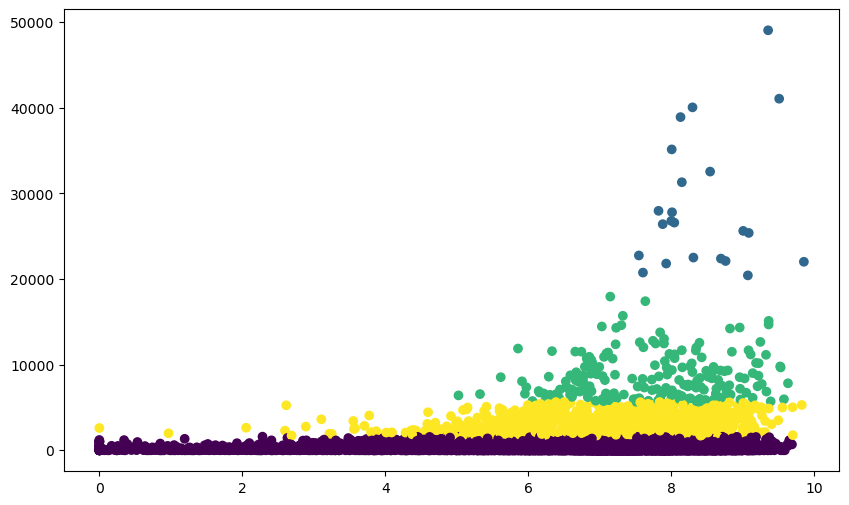

In [31]:
plt.figure(figsize=(10,6))
plt.scatter(x.BALANCE,x.PURCHASES,c=tahmin);

In [32]:
allscore=[]
allcluster=[]
distances=[]
def clust(kactane):
    for i in range(1,kactane):
        i=i+1
        model=KMeans(i)
        model=model.fit(x)
        tahmin=model.predict(x)
        score=silhouette_score(x,tahmin)
        distance=model.inertia_
        print('Cluster ',i," score: ", score)
        allscore.append(score)
        allcluster.append(i)
        distances.append(distance)

In [33]:
clust(10)

Cluster  2  score:  0.8606143206041592
Cluster  3  score:  0.798334499568631
Cluster  4  score:  0.7357894821741322
Cluster  5  score:  0.6920212043687829
Cluster  6  score:  0.6900943854508856
Cluster  7  score:  0.660327601774728
Cluster  8  score:  0.653730767907907
Cluster  9  score:  0.6334204521822552
Cluster  10  score:  0.6206134334204958


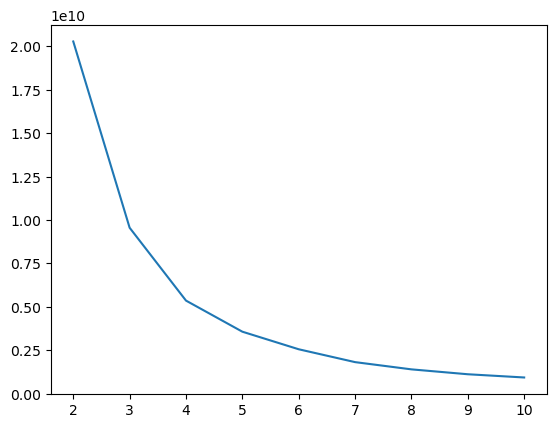

In [34]:
plt.plot(allcluster,distances);

In [35]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [36]:
link_data=linkage(x,method='ward', metric='euclidean')

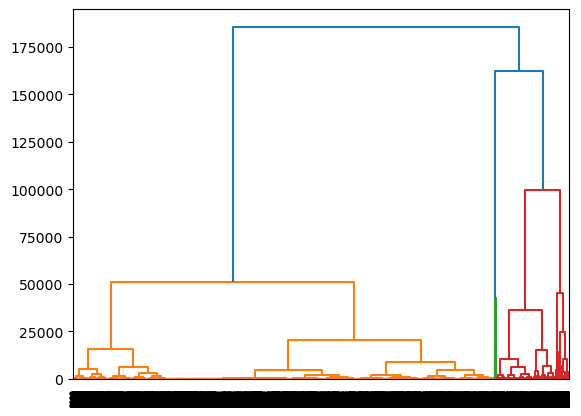

In [38]:
dendrogram(link_data)
plt.show()

In [39]:
from sklearn.cluster import DBSCAN

In [40]:
clusters=DBSCAN(eps=2.5,min_samples=4).fit(x)
set(clusters.labels_)

{-1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142}

In [43]:
x[x["cluster"]==2]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
6,6.442955,1.000000,7091.01,8.764620,6.535793,0.000000,1.000000,0.693147,0.693147,0.000000,0.000000,4.174387,9.510519,8.757047,5.293636,0.693147,12,2
21,8.759438,1.000000,6359.95,8.684577,6.111268,5.438202,1.000000,0.650588,0.693147,0.333333,1.945910,4.532599,9.328212,7.639623,7.415040,0.000000,12,2
120,9.048513,1.000000,6724.26,8.319006,7.872905,7.431063,1.000000,0.650588,0.693147,0.500000,2.397895,4.454347,9.741027,7.544203,7.681766,0.000000,12,2
125,7.780687,1.000000,12462.44,9.430555,0.000000,0.000000,0.916667,0.650588,0.000000,0.000000,0.000000,5.384495,7.937732,9.361319,7.601897,0.000000,12,2
144,7.680027,1.000000,5779.36,8.142508,7.759542,0.000000,1.000000,0.693147,0.693147,0.000000,0.000000,4.584967,8.779711,8.393309,6.305251,0.000000,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7378,8.349820,1.000000,11994.71,9.392304,0.000000,6.209639,0.250000,0.223144,0.000000,0.083333,1.098612,2.197225,9.506809,6.234013,7.453936,0.000000,12,2
7553,7.610056,1.000000,12024.37,9.325908,6.686198,0.000000,1.000000,0.693147,0.405465,0.000000,0.000000,4.897840,8.987322,9.351614,6.323734,0.287682,12,2
8215,8.397859,1.000000,6005.90,8.672380,5.127054,6.343831,1.000000,0.459532,0.650588,0.083333,0.693147,4.127134,9.259226,7.409394,6.974026,0.000000,12,2
8541,8.109923,1.000000,8209.77,7.704938,8.698262,0.000000,1.000000,0.348307,0.693147,0.000000,0.000000,4.875197,9.210440,7.572027,6.556643,0.080042,12,2
